## HACK THE FEED HACKATHON

## 1. Problem Description

The challenge at hand involves unraveling a rich tapestry of social media data, deciphering its intricacies, and ultimately harnessing this wealth of information to generate transformative insights. This task entails not only understanding the underlying patterns and nuances within the data but also the ability to extract valuable knowledge that can drive significant changes and innovations in various aspects of our endeavors.


## 2. Data Cleaning 

### Importing modules and libraries

In [53]:
#importing primary modules
import pandas as pd
import numpy as np

#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib for inline plot
%matplotlib inline

#import and setting warning
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [54]:
#load the dataset
IBTC  = pd.read_csv(r'C:\Users\DELL\Downloads\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')

#set maximum viewable columns
pd.set_option("display.max_column", 147)



#viewing the first five rows
IBTC.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 12:03 pm,7085212016608456704,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Your money should not be a gamble. Before you ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,7/12/2023 8:00 pm,7084969706025009152,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"What skill (s) do you have, that no one ever t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [55]:
IBTC.shape

(7760, 147)

The data contains 7760 rows and 147 columns

In [56]:
IBTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Columns: 147 entries, Date to Tags
dtypes: float64(127), int64(1), object(19)
memory usage: 8.7+ MB


### Data Cleaning and Preprocessing

**checking for null values**

In [57]:
IBTC.isnull().sum()

Date                          0
Post ID                       0
Network                       0
Post Type                     0
Content Type                  0
                           ... 
Card Impressions           7760
Card Teaser Impressions    7760
Card Teaser Clicks         7760
Poll Votes                 7758
Tags                       6120
Length: 147, dtype: int64

**dropping the columns which null values are more than 4000**

In [58]:
IBTC.dropna(axis=1, thresh=4000,inplace = True)

In [59]:
#checking the new shape of the dataset
IBTC.shape

(7760, 20)

**Check and correct column data types**

In [60]:
IBTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Post ID                           7760 non-null   int64  
 2   Network                           7760 non-null   object 
 3   Post Type                         7760 non-null   object 
 4   Content Type                      7760 non-null   object 
 5   Profile                           7760 non-null   object 
 6   Sent by                           7760 non-null   object 
 7   Link                              7756 non-null   object 
 8   Post                              7729 non-null   object 
 9   Impressions                       6332 non-null   object 
 10  Organic Impressions               6332 non-null   object 
 11  Engagement Rate (per Impression)  6332 non-null   object 
 12  Engage

#### Converting the datatypes

In [61]:
# Convert the specified columns to numeric
columns_to_convert = ['Impressions', 'Organic Impressions']

for column in columns_to_convert:
    IBTC[column] = pd.to_numeric(IBTC[column].str.replace(',', ''))

# Check the data types after conversion
IBTC.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Post ID                           7760 non-null   int64  
 2   Network                           7760 non-null   object 
 3   Post Type                         7760 non-null   object 
 4   Content Type                      7760 non-null   object 
 5   Profile                           7760 non-null   object 
 6   Sent by                           7760 non-null   object 
 7   Link                              7756 non-null   object 
 8   Post                              7729 non-null   object 
 9   Impressions                       6332 non-null   float64
 10  Organic Impressions               6332 non-null   float64
 11  Engagement Rate (per Impression)  6332 non-null   object 
 12  Engage

**filling the numeric null values with 0**

In [70]:
IBTC[columns_to_convert] = IBTC[columns_to_convert].fillna(0).astype(int)




In [71]:
# Remove commas from numeric columns
IBTC[columns_to_convert] = IBTC[columns_to_convert].replace(',', '', regex=True)

# Convert the columns to integers
IBTC[columns_to_convert] = IBTC[columns_to_convert].astype(int)





In [72]:
# Convert multiple columns from float to integer
columns_to_convert = ['Organic Impressions', 'Reactions','Comments','Shares','Post Link Clicks','Post Clicks (All)']  # Replace with the names of the columns you want to convert

IBTC[columns_to_convert] = IBTC[columns_to_convert].astype(int)

In [73]:
#view the total number of duplicate values
IBTC.duplicated().sum()

0

### changing the date column to datetime format

In [74]:
#change to datetime format
IBTC['Date'] = pd.to_datetime(IBTC['Date'], format='%m/%d/%Y %I:%M %p')

### Creating a separate column for Time and month

In [75]:
# Extract the time and create a new column 'time'
IBTC['time'] = IBTC['Date'].dt.time

# Extract the time from the 'timestamp' column
IBTC['time'] = IBTC['Date'].dt.strftime('%I:%M %p')


# Extract the month and create a new column
IBTC['month'] = IBTC['Date'].dt.month


# Create a dictionary to map month values to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}


IBTC['month'] = IBTC['month'].replace(month_mapping)

IBTC.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),time,month
0,2023-07-13 12:03:00,7085212016608456704,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Your money should not be a gamble. Before you ...,0,0,NaN,NaN,0,NaN,0,0,NaN,0,0,12:03 PM,Jul
1,2023-07-12 20:00:00,7084969706025009152,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"What skill (s) do you have, that no one ever t...",0,0,NaN,NaN,0,NaN,0,0,NaN,0,0,08:00 PM,Jul
2,2023-07-12 19:00:00,7084954641788018688,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPos...,Sade was able to acquire a home loan and make ...,63,63,9.52%,6,3,3.0,0,0,4.76%,3,3,07:00 PM,Jul
3,2023-07-11 14:49:00,7084529022105231360,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Safeguard every aspect of your operations with...,164,164,1.83%,3,1,1.0,0,0,1.22%,2,2,02:49 PM,Jul
4,2023-07-11 09:17:00,7084445462967070721,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"Together, we can make a difference and build a...",376,376,5.05%,19,11,11.0,0,0,2.13%,8,8,09:17 AM,Jul


Now month has its separate column while time has its separate column as well

#### Verify Data Consistency

During the dataset exploration, it was observed that the "impressions" and "organic impressions" columns had identical values, as did the "Post Link Clicks" and "Post Clicks (All)" columns shared the same figures. In response, a decision was made to conduct a data consistency verification process.



In [76]:
# Check if the two columns are identical
IBTC.describe()

,Post ID,Impressions,Organic Impressions,Reactions,Likes,Comments,Shares,Post Link Clicks,Post Clicks (All)
count,7.760000e+03,7760.000000,7760.000000,7760.000000,6332.000000,7760.000000,7760.000000,7760.000000,7760.000000
mean,6.689876e+18,883.953479,883.953479,12.853866,15.752685,0.940722,1.148454,26.219459,26.219459
std,2.613510e+17,1346.361244,1346.361244,28.047394,30.305455,7.029413,2.070699,165.311125,165.311125
min,5.869022e+18,0.000000,0.000000,-103.000000,-103.000000,-16.000000,-6.000000,0.000000,0.000000
25%,6.485442e+18,287.000000,287.000000,2.000000,6.000000,0.000000,0.000000,1.000000,1.000000
50%,6.718173e+18,621.000000,621.000000,8.000000,10.000000,0.000000,0.000000,6.000000,6.000000
75%,6.907367e+18,1088.250000,1088.250000,15.000000,17.000000,0.000000,2.000000,13.000000,13.000000
max,7.085212e+18,37889.000000,37889.000000,957.000000,957.000000,284.000000,26.000000,6089.000000,6089.000000


In [77]:
#since they are identical we have to drop one of the columns each
IBTC = IBTC.drop(['Impressions', 'Post Clicks (All)'], axis=1)


**Documentation: Decision to Remove Redundant Columns**

**Description of Redundant Columns:**
- Within the dataset, there were duplicative pairs of columns, specifically "impressions" and "organic impressions," as well as "Post Link Clicks" and "Post Clicks (All)."

**Rationale for Column Removal:**
- During the initial data exploration phase, it became evident that both "impressions" and "organic impressions," as well as "Post Link Clicks" and "Post Clicks (All)," contained the same values.

**Impact on Data and Analytical Process:**
- The choice to eliminate these redundant columns streamlines the dataset by eliminating unnecessary data duplication. This simplification reduces the dataset's complexity, enhancing manageability and minimizing potential confusion.

**Influence on Analytical Insights:**
- The removal of these redundant columns has minimal consequences on our analytical outcomes. The columns that were removed held indistinguishable data, and their exclusion does not compromise the quality or integrity of our analytical findings.

**Transparency and Reproducibility:**
- This documentation serves the purpose of maintaining transparency throughout the data cleansing process. It ensures that future analysts can replicate the same data cleaning actions, promoting reproducibility and accountability.


### EXPLORATORY DATA ANALYSIS


**Here's an explanation of each column in the dataset we'll be working with:**

Based on the column names you provided, it appears that you have a dataset related to social media posts with various metrics. Here's a brief explanation of each column:

1. **Date:** The date when the social media post was made.

2. **Post ID:** An identifier for the social media post.

3. **Network:** The social media platform where the post was made (e.g., LinkedIn, Instagram, Facebook, Twitter).

4. **Post Type:** The type of post made.

5. **Content Type:** The type of content in the post (e.g., text, image, video).

6. **Profile:** The social media profile/account associated with the post.

7. **Sent by:** The user or entity that sent or posted the content.

8. **Link:** The link included in the post.

9. **Post:** The actual content of the social media post.

10. **Impressions:** The total number of times the post was viewed.

11. **Organic Impressions:** The number of times the post was viewed without paid promotion (organic views).

12. **Engagement Rate (per Impression):** A calculated metric representing the engagement rate of the post per impression. This is usually calculated as (Engagements / Impressions) * 100.

13. **Engagements:** The total number of interactions with the post, including likes, comments, shares, and other actions.

14. **Reactions:** The number of reactions (e.g., likes, emojis) to the post.

15. **Likes:** The number of likes the post received.

16. **Comments:** The number of comments on the post.

17. **Shares:** The number of times the post was shared by users.

18. **Click-Through Rate:** A calculated metric representing the click-through rate of the post. This is usually calculated as (Post Link Clicks / Impressions) * 100.

19. **Post Link Clicks:** The number of clicks on links included in the post.

20. **Post Clicks (All):** The total number of clicks on the post, including link clicks and other interactions.

You can perform various analyses on this dataset, such as determining which types of content or posts are most engaging, identifying the best-performing social media platforms, or tracking the growth of engagement over time. Depending on your specific goals, you can use different statistical and data visualization techniques to extract actionable insights from this data.

### UNIVARIATE ANALYSIS
**Understanding Distribution and Trends:**

#####  TRENDS IN ORGANIC IMPRESSIONS OVER TIME

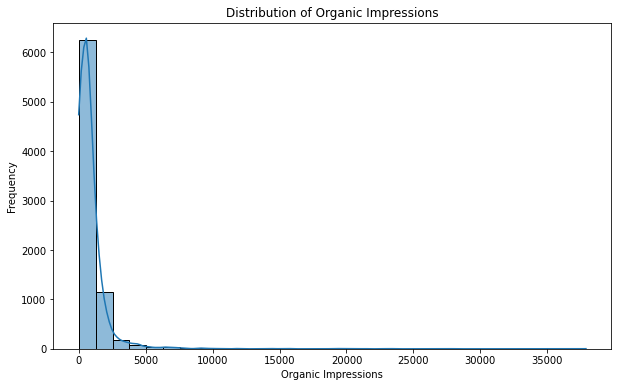

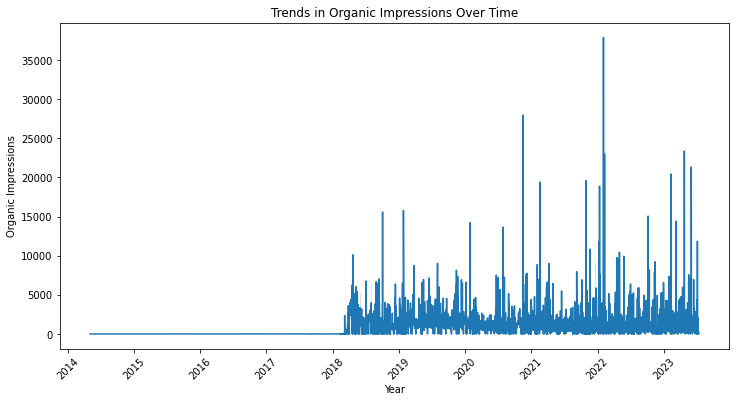

In [78]:
# Convert the 'Organic Impressions' column to a numeric data type
IBTC['Organic Impressions'] = pd.to_numeric(IBTC['Organic Impressions'], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

# Create a histogram to visualize the distribution of Organic Impressions
plt.figure(figsize=(10, 6))
sns.histplot(data=IBTC, x='Organic Impressions', bins=30, kde=True)
plt.title('Distribution of Organic Impressions')
plt.xlabel('Organic Impressions')
plt.ylabel('Frequency')
plt.show()

# Create a line plot to visualize trends in impressions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=IBTC, x='Date', y='Organic Impressions')
plt.title('Trends in Organic Impressions Over Time')
plt.xlabel('Year')
plt.ylabel('Organic Impressions')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()







In the LinkedIn dataset, the count of organic impressions began to rise notably after the year 2018, reaching its peak in 2022. However, subsequent to this peak in 2022, there was a significant decline in organic impressions.

###### TRENDS IN  REACTION OVER TIME

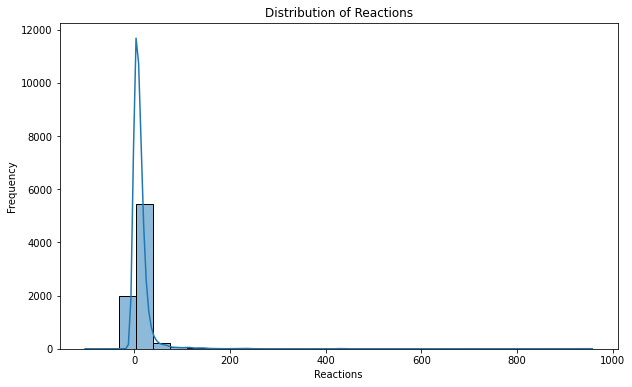

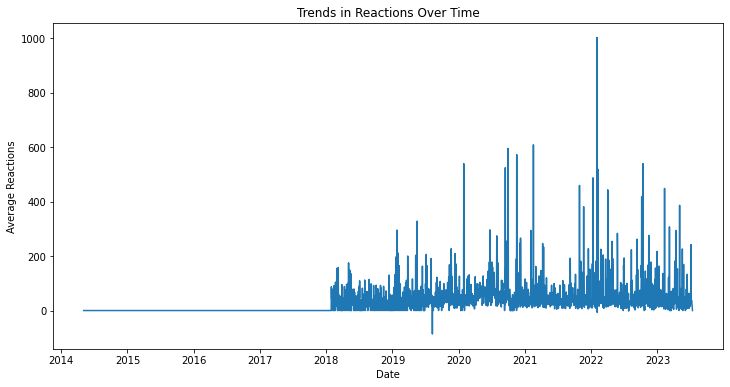

In [79]:
# creating a histogram for distribution.
plt.figure(figsize=(10, 6))
sns.histplot(data=IBTC, x='Reactions', bins=30, kde=True)
plt.title('Distribution of Reactions')
plt.xlabel('Reactions')
plt.ylabel('Frequency')
plt.show()

# To examine trends over time, you can group data by date and plot a line chart.

IBTC.set_index('Date', inplace=True)  # Set 'Date' as the index for time series analysis.

# Resample data by a time period (e.g., daily) and calculate the mean reactions for that period.
resampled_data = IBTC['Reactions'].resample('D').sum()

# Create a line plot to visualize trends in reactions over time.
plt.figure(figsize=(12, 6))
sns.lineplot(data=resampled_data)
plt.title('Trends in Reactions Over Time')
plt.xlabel('Date')
plt.ylabel('Average Reactions')
plt.show()

The decline in organic impressions and reactions on LinkedIn after their peak in 2022 could be attributed to a variety of factors, which may include:

1. **Algorithm Changes:** Social media platforms frequently update their algorithms to prioritize content that is more relevant and engaging to users. A change in the algorithm could lead to a decrease in the reach and visibility of organic posts, resulting in lower impressions and reactions.

2. **Saturation:** Over time, the platform may have become saturated with content, making it more challenging for individual posts to stand out and gain traction. Increased competition for user attention can lead to reduced organic engagement.

3. **Content Quality:** The quality and relevance of the content being posted may have declined. Users tend to engage more with high-quality, valuable content. If the content being shared is less engaging or less relevant to the audience, it can lead to decreased reactions and impressions.

4. **Follower Growth:** If the rate of new followers or connections slowed down after 2022, it could result in a smaller audience seeing and engaging with posts, leading to a decline in organic metrics.

5. **Content Strategy:** Changes in the bank's content strategy, posting frequency, or the types of content shared could also play a role. Adjustments to the content strategy may take time to resonate with the audience.


###### TRENDS IN ENGAGEMENTS  OVER TIME

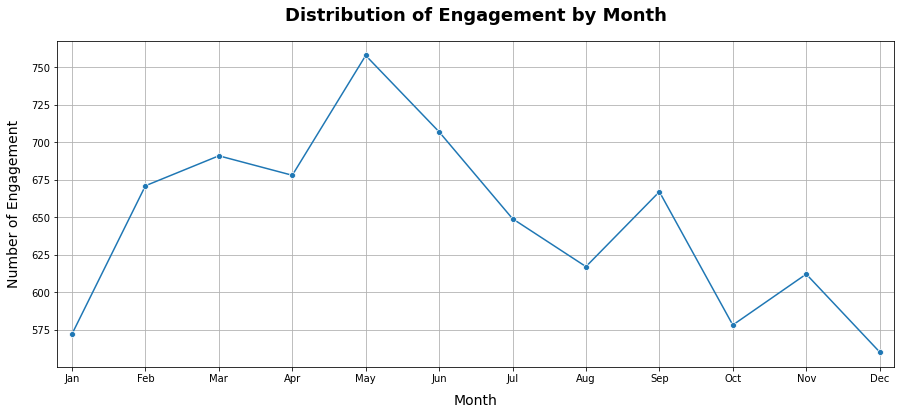

In [80]:
#Count the number of engagements per month
Engagement_month = IBTC['month'].value_counts()

#Reorder the engagement month counts
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Engagement_month = Engagement_month.reindex(month_ordered)


# Create a line chart
plt.figure(figsize = (15, 6))

sns.lineplot(x = Engagement_month.index, y = Engagement_month.values, marker = 'o')

plt.title('Distribution of Engagement by Month', pad = 20, fontsize = 18, weight = 'bold')
plt.xlabel('Month', labelpad = 10, fontsize = 14)
plt.ylabel('Number of Engagement', labelpad = 10, fontsize = 14)

#Realign the x grids and show plot grid
plt.xlim(xmin = -0.2, xmax = 11.2)
plt.grid(True);

 The dataset indicates that May stands out with the highest levels of engagement. This observation provides several insights to consider:

1. **Content Strategy Analysis:** It's important to scrutinize the content that was posted in May in comparison to other months. Determine if there were specific content types, themes, or campaigns that performed exceptionally well during this period. This analysis can guide future content strategies to emphasize what resonates most with the audience.

2. **Timing Evaluation:** Evaluate the timing of your posts in May. Were there more frequent posts during this month, or were specific days and hours particularly effective in driving engagement? Identifying optimal posting times can inform scheduling strategies for other months.

3. **Holiday and Event Impact:** Assess whether May coincided with holidays, events, or special occasions that might have contributed to increased engagement. Seasonal events, promotions, or partnerships could have drawn extra attention from the audience.

4. **Competitive Benchmarking:** Conduct a competitive analysis by comparing your engagement data with industry peers or benchmarks. Are there industry-wide trends that align with the surge in May? Understanding broader trends in the financial sector can provide context.

5. **Audience Behavior Examination:** Delve into your audience's behavior. Did their interests or preferences change during May? Understanding shifts in audience behavior is crucial for tailoring content to meet evolving expectations.

6. **Campaign Impact Assessment:** Review any marketing campaigns or initiatives that were active in May. Successful campaigns often correlate with higher engagement levels. Evaluating campaign performance during this period can yield insights for future campaigns.

In summary, the high engagement observed in May offers valuable insights for refining content strategies, optimizing posting schedules, and understanding the interplay of various factors that drive engagement in the financial sector.


###### Distribution of likes by month

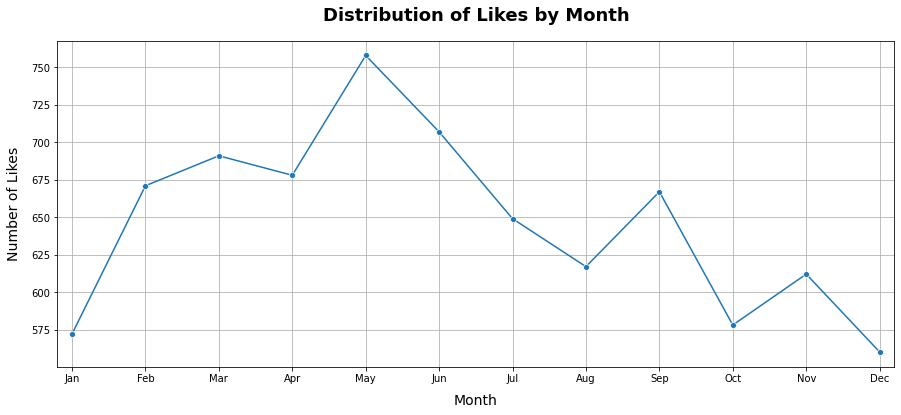

In [81]:

#Count the number of likes per month
Likes_month = IBTC['month'].value_counts()

#Reorder the likes month counts
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Likes_month = Likes_month.reindex(month_ordered)


# Create a line chart
plt.figure(figsize = (15, 6))

sns.lineplot(x = Likes_month.index, y = Likes_month.values, marker = 'o')

plt.title('Distribution of Likes by Month', pad = 20, fontsize = 18, weight = 'bold')
plt.xlabel('Month', labelpad = 10, fontsize = 14)
plt.ylabel('Number of Likes', labelpad = 10, fontsize = 14)

#Realign the x grids and show plot grid
plt.xlim(xmin = -0.2, xmax = 11.2)
plt.grid(True);







The dataset also reveals that May stands out as having the highest number of likes, in addition to engagements. This provides further insights:

1. **Consistent Engagement:** The fact that May records both the highest engagements and likes points to a consistent trend in user engagement. This consistency suggests a positive and ongoing relationship with your audience during that particular month.

2. **Content Resonance:** The content posted in May likely resonated strongly with your audience. The substantial number of likes indicates that your posts evoked strong emotional responses. Analyzing the specific content and themes that drove these likes can provide valuable insights into what appeals most to your audience.

3. **Quality Content:** The success of May in terms of both engagements and likes suggests that your content during that period was of high quality and engaging. This content may have been informative, entertaining, or inspirational, prompting users to react positively.

4. **Content Replication:** Consider replicating the content strategy and themes from May in other months, if applicable. Identifying what worked well in May can serve as a guide for your future content creation efforts, helping you maintain high levels of engagement.

In summary, the fact that May consistently records the highest engagements and likes indicates the effectiveness of your content and audience engagement during that month. It presents an opportunity to learn from this success and leverage these insights to create more engaging and resonant content in the future.

### Distribution of Shares

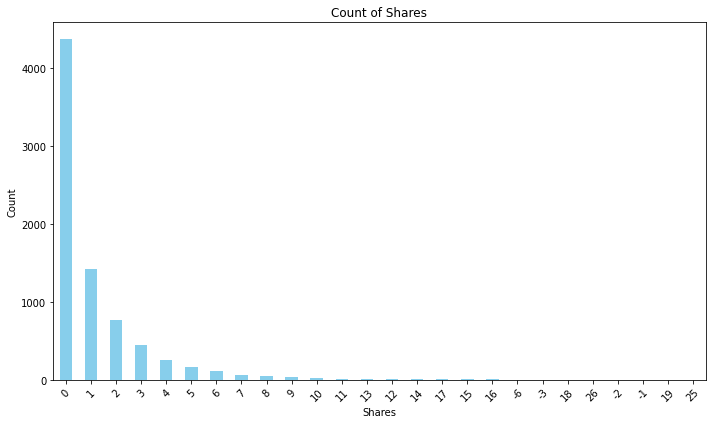

In [82]:
Shares_count = IBTC['Shares'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
Shares_count.plot(kind='bar', color='skyblue')
plt.xlabel('Shares')
plt.ylabel('Count')
plt.title('Count of Shares')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()


The observation that people don't seem to share the posts frequently suggests a specific behavior among your audience. Several insights and considerations can be derived from this observation:

1. **Content Shareability:** Assess the shareability of your content. Are you creating content that encourages sharing? Content that is informative, entertaining, or emotionally resonant often receives more shares. Consider tailoring your content to make it more shareable.

2. **Audience Engagement:** The lack of frequent sharing may indicate that your audience prefers to engage with your content in other ways, such as liking or commenting. It's essential to understand how your audience prefers to interact with your posts and cater to those preferences.

3. **Share Buttons and Calls to Action:** Ensure that your posts have share buttons and clear calls to action that prompt users to share when appropriate. Making it easy for users to share content can increase sharing rates.

4. **Content Relevance:** Reevaluate the relevance of your content to your audience's interests and needs. Content that directly addresses their concerns or provides value is more likely to be shared.

5. **Content Variety:** Experiment with different types of content. Diversifying your content strategy with a mix of images, videos, stories, and informative posts can encourage different forms of engagement, including sharing.

6. **Incentives and Contests:** Consider running sharing-focused campaigns, incentives, or contests that motivate users to share your content with their networks. Offering rewards or recognition can encourage sharing.

In summary, the observation that people don't frequently share your posts highlights an area for potential improvement in your social media strategy. By understanding your audience's preferences, optimizing content for shareability, and experimenting with various approaches, you can encourage more sharing and expand your content's reach.

###### Distribution of Content Type

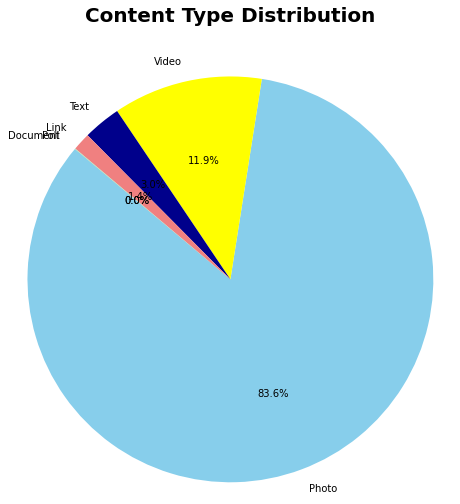

In [83]:
# Calculate the count of each Content Type
Content_Type_counts = IBTC['Content Type'].value_counts()

plt.figure(figsize = (8, 8))

# Create a pie chart
plt.pie(Content_Type_counts, labels = Content_Type_counts.index, autopct = '%1.1f%%', startangle = 140, colors = ['skyblue','yellow','darkblue' ,'lightcoral'])

plt.title('Content Type Distribution', pad = 40, fontsize = 20, weight = 'bold')
plt.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

photos contents were posted more in this platform, followed by video contents

###### Distribution of Comments

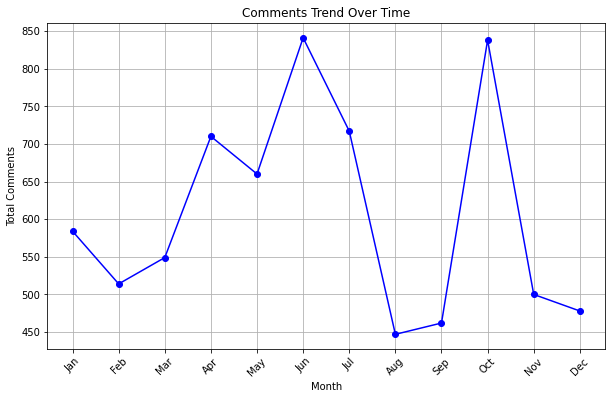

In [84]:

# Group the data by month and calculate the total Comments for each month
Comments_by_month = IBTC.groupby('month')['Comments'].sum()

# Define the custom order for months
custom_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert the 'month' column to a categorical data type with the custom order
Comments_by_month.index = pd.Categorical(Comments_by_month.index, categories=custom_order, ordered=True)

# Sort the index in the custom order
Comments_by_month = Comments_by_month.sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(Comments_by_month.index, Comments_by_month.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Comments')
plt.title('Comments Trend Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()


The observed pattern of comments increasing to its peak in June, followed by a significant decline until September, then a sudden surge in October, and another subsequent decline can be indicative of several factors and insights:

1. **Content Relevance:** The type of content you posted during these months could have influenced comment activity. Content that resonates deeply with your audience and encourages discussion is more likely to generate comments.

2. **Marketing Campaigns:** Analyze if any marketing campaigns or initiatives were active during these periods. Successful campaigns can drive more engagement, including comments, as users respond to promotions or content related to the campaign.

3. **Current Events:** Comments may surge during events or news relevant to your industry or niche. Users may be more inclined to discuss or seek information during such times.

4. **Community Engagement:** Building and fostering an active online community can lead to increased comments. Encouraging discussions and user-generated content can boost comment activity.

5. **User Engagement Efforts:** Assess whether your engagement efforts, such as responding to comments or actively participating in discussions, changed during these months. More active engagement from your side can stimulate comments.

6. **Feedback and Surveys:** Seeking feedback from your audience can provide insights into why comment activity fluctuates. User surveys or direct interactions can help uncover the reasons behind these patterns.

7. **Content Calendar:** Review your content calendar and posting frequency during these months. Consistent posting and a well-planned content strategy can maintain engagement levels.


##### Distribution of Post Link Clicks

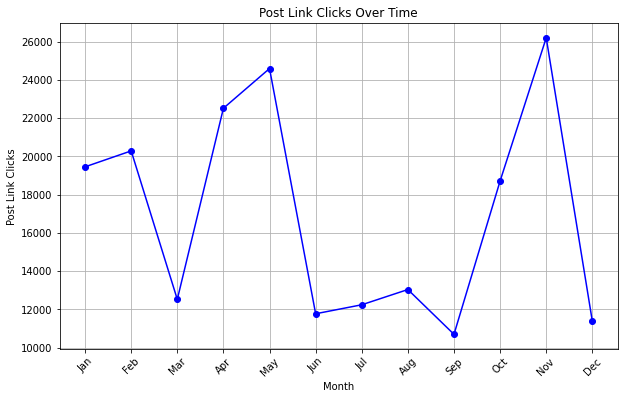

In [85]:
# Group the data by month and calculate the total Post Link Clicks for each month
Post_Link_Clicks_by_month = IBTC.groupby('month')['Post Link Clicks'].sum()

# Define the custom order for months
custom_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert the 'month' column to a categorical data type with the custom order
Post_Link_Clicks_by_month.index = pd.Categorical(Post_Link_Clicks_by_month.index, categories=custom_order, ordered=True)

# Sort the index in the custom order
Post_Link_Clicks_by_month = Post_Link_Clicks_by_month.sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(Post_Link_Clicks_by_month.index, Post_Link_Clicks_by_month.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Post Link Clicks')
plt.title('Post Link Clicks Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()

The observation that people clicked on links attached to posts more frequently in the months of May and November indicates specific periods of heightened interest or engagement with the linked content.
The content linked in May and November may have been highly relevant and valuable to your audience during those months. Understanding what topics or offerings attracted clicks can help you tailor your content strategy.
By delving deeper into the specifics of the linked content, audience behavior, and your content strategy during May and November, you can gain valuable insights to replicate successful approaches and optimize your link click performance in the future.

### BIVARIATE ANALYSIS

**correlations between all pairs of numerical variables**

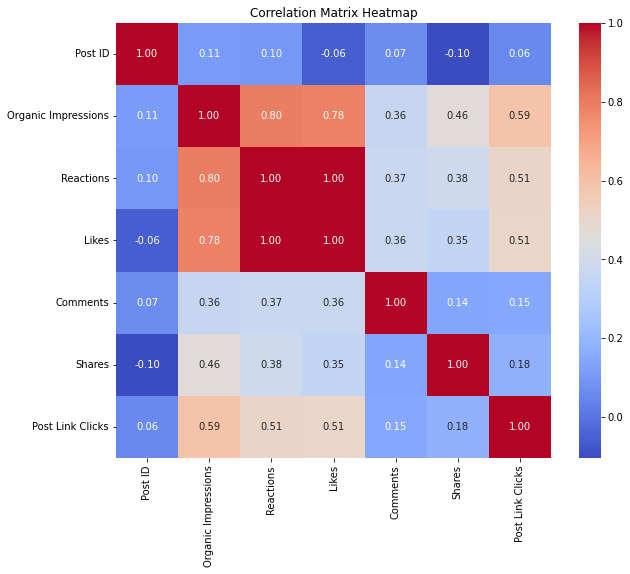

In [86]:
# Select only the numerical columns from the DataFrame
numerical_columns = IBTC.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


The observation that reactions and likes have a strong positive correlation of 1.00 indicates a perfect linear relationship between these two variables. In other words, as reactions increase, likes increase proportionally, and vice versa. This perfect positive correlation suggests that users who react to content are also consistently choosing to like it, and vice versa.

Additionally, the positive correlation of 0.80 between organic impressions and reactions indicates a strong linear relationship between these two variables, albeit not a perfect one. An 0.80 correlation suggests that there is a strong tendency for an increase in organic impressions to be associated with a corresponding increase in reactions, but it allows for some variation or noise in the relationship.


The strong positive correlations that has been identified in this analysis provide valuable insights that can help enhance your understanding of user engagement with your content and inform your content strategy in the following ways:

1. **Engagement Prediction:** The perfect correlation of 1.00 between reactions and likes suggests a consistent user behavior pattern. When users react to content, they are highly likely to also like it, and vice versa. This insight can be used to predict user engagement more accurately. For example, if you observe a high number of likes on a post, you can reasonably anticipate a similar number of reactions. 

2. **Content Assessment:** When analyzing your content, you can pay attention to the types of posts that receive both reactions and likes. These are indicators of highly engaging content that resonates with your audience. You can further dissect this content to identify what elements or themes are driving this engagement and replicate those strategies in future posts.

3. **Engagement Amplification:** Understanding the positive correlation between organic impressions and reactions (0.80) is particularly valuable. It suggests that when your content reaches more people (higher organic impressions), it tends to elicit a higher number of reactions. This is a key insight for engagement amplification. By focusing on increasing the reach of your content through various strategies (e.g., timing, hashtags, and collaborations), you can likely boost overall engagement.

4. **Content Strategy Refinement:** Armed with these insights, you can refine your content strategy. Prioritize the creation and promotion of content that aligns with what your audience tends to react to and like. Additionally, consider strategies to increase the organic reach of your content, as this is strongly correlated with higher engagement.

5. **Performance Evaluation:** Use these correlations as benchmarks to evaluate the success of your content over time. You can set performance goals based on the expected relationships between reactions, likes, and organic impressions. If a particular post or campaign deviates significantly from these expected correlations, it may warrant further investigation or adjustments to your strategy.

6. **Data-Driven Decision-Making:** Incorporate these insights into your decision-making processes. When planning content calendars, promotions, or ad campaigns, leverage the understanding that reactions and likes are closely linked, and organic reach has a strong influence on reactions.

In summary, these strong positive correlations in your data analysis help you make more informed decisions about your content strategy, anticipate user engagement patterns, and optimize your efforts to drive higher engagement and reach on your social media platform.

**Engagement Rate (per Impression) VS Content Type / Organic Impressions VS Content Type and Reactions VS Content Type** 

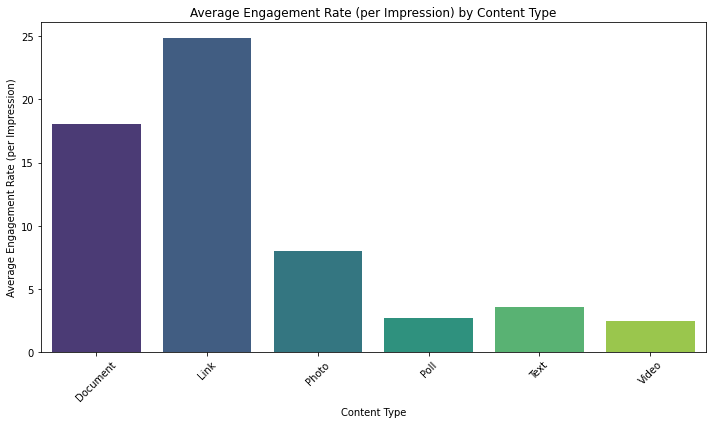

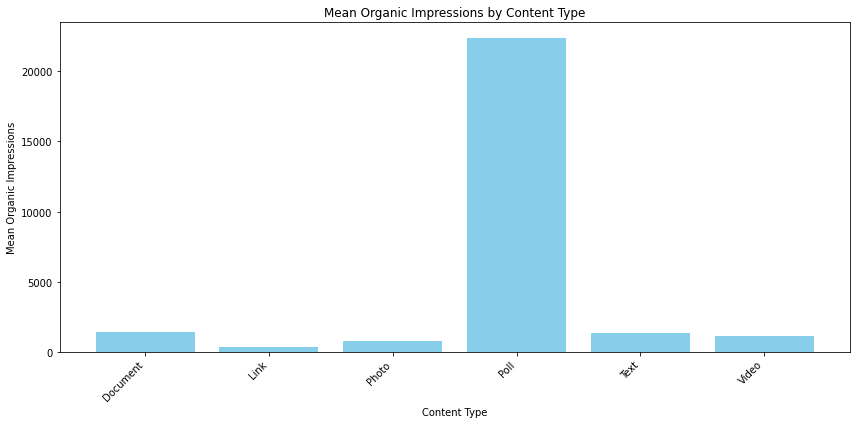

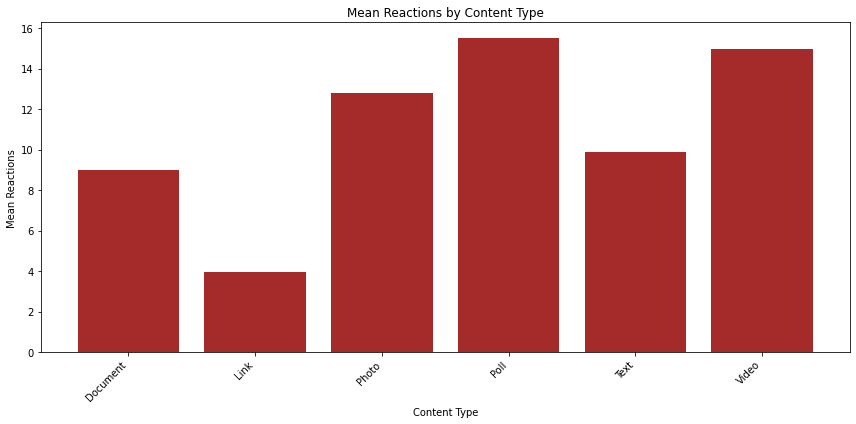

In [87]:
#Engagement rate

# Convert the 'Engagement Rate (per Impression)' column to string and then remove commas and percentage symbols
IBTC['Engagement Rate (per Impression)'] = IBTC['Engagement Rate (per Impression)'].astype(str).str.replace(',', '').str.rstrip('%')

# Convert the 'Engagement Rate (per Impression)' column to a float
IBTC['Engagement Rate (per Impression)'] = IBTC['Engagement Rate (per Impression)'].astype(float)

# Calculate the average engagement rate per content type
average_engagement_rate = IBTC.groupby('Content Type')['Engagement Rate (per Impression)'].mean().reset_index()

# Create a bar plot for the average engagement rate
plt.figure(figsize=(10, 6))
sns.barplot(data=average_engagement_rate, x='Content Type', y='Engagement Rate (per Impression)', palette='viridis')
plt.xlabel('Content Type')
plt.ylabel('Average Engagement Rate (per Impression)')
plt.title('Average Engagement Rate (per Impression) by Content Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()



#Organic Impressions

# Group the data by 'Content Type' and calculate the mean 'Organic Impressions' for each group
impressions_by_content_type = IBTC.groupby('Content Type')['Organic Impressions'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(impressions_by_content_type['Content Type'], impressions_by_content_type['Organic Impressions'], color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Mean Organic Impressions')
plt.title('Mean Organic Impressions by Content Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



#Reactions

# Group the data by 'Content Type' and calculate the mean 'Reactions' for each group
Reactions_by_content_type = IBTC.groupby('Content Type')['Reactions'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(Reactions_by_content_type['Content Type'], Reactions_by_content_type['Reactions'], color='brown')
plt.xlabel('Content Type')
plt.ylabel('Mean Reactions')
plt.title('Mean Reactions by Content Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The observation that link contents generate a high Engagement Rate (per Impression) while poll contents generate more organic impressions, and video, photo, and poll contents generate more reactions provides several valuable insights for your content strategy:

1. **Content Effectiveness:** Different content types serve different purposes. Links are highly effective at engaging the audience on a per-impression basis, suggesting that they may lead to deeper engagement, such as click-throughs or conversions. Polls, on the other hand, excel at reaching a broad audience and generating organic impressions.

2. **Engagement Quality vs. Quantity:** Link contents may be particularly effective at fostering high-quality engagement, as indicated by the high Engagement Rate (per Impression). This could signify that your links are providing valuable information or driving specific actions from the audience.

3. **Content Diversity:** The mix of content types in your strategy appears to be successful. Video, photo, and poll contents generate more reactions, indicating that they resonate strongly with your audience and elicit emotional responses. Diversity in content keeps your audience engaged and interested.

4. **Tailored Approach:** Recognizing the strengths of each content type allows you to tailor your approach to your campaign objectives. Use links when you want to maximize engagement quality, polls for broad reach, and video, photo, or poll contents when aiming for high reactions.

5. **Content Optimization:** Analyze the specific characteristics of the most successful content types within each category (e.g., the topics of the links, the style of photos or videos, the types of poll questions). This can help you optimize future content to align with what resonates best with your audience.

In summary, the insights gained from content type analysis enable you to refine your content strategy by leveraging the strengths of each content type. By aligning your content with your campaign objectives and audience preferences, you can achieve a more impactful and targeted social media presence.

**Engagements and Organic Impressions  Over Time**

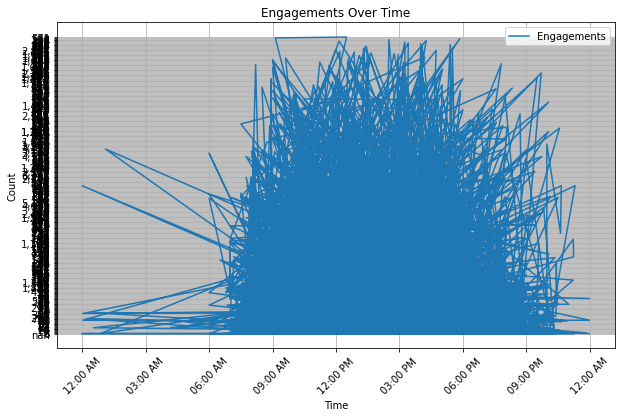

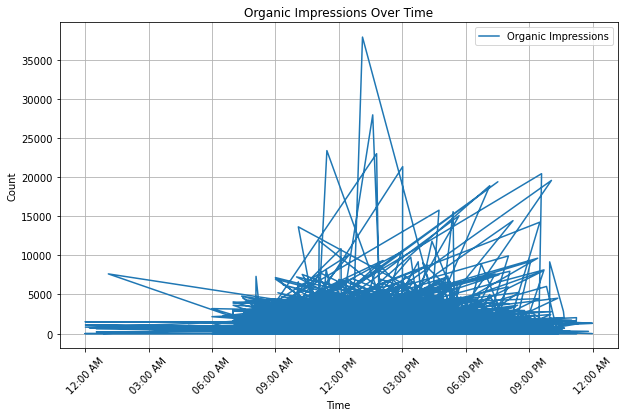

In [88]:
#ENGAGEMENTS

from matplotlib.dates import DateFormatter

# Ensure 'time' column is in datetime format
IBTC['time'] = pd.to_datetime(IBTC['time'])

# Convert the 'Engagements' column to string
IBTC['Engagements'] = IBTC['Engagements'].astype(str)

# Create line plots for Engagement over time
plt.figure(figsize=(10, 6))
plt.plot(IBTC['time'], IBTC['Engagements'], label='Engagements')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Engagements Over Time')
plt.legend()
plt.grid(True)

# Set the date and time format for the x-axis
date_format = DateFormatter("%I:%M %p")  # Format for Hour:Minute AM/PM
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()


#ORGANIC IMPRESSIONS
# Create line plots for Organic Impressions over time
plt.figure(figsize=(10, 6))
plt.plot(IBTC['time'], IBTC['Organic Impressions'], label='Organic Impressions')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Organic Impressions Over Time')
plt.legend()
plt.grid(True)

# Set the date and time format for the x-axis
date_format = DateFormatter("%I:%M %p")  # Format for Hour:Minute AM/PM
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()


The observation that posts receive the most engagements from 6 a.m. to 9 p.m., while the most organic impressions also occur during the same time period (6 a.m. to 9 p.m.), suggests several insights for your social media strategy:

1. **Alignment of Engagement and Impressions:** The fact that both engagements and organic impressions peak during the same hours indicates that this is a key window of opportunity for your content. Your audience is actively engaging with and seeing your posts during these hours.

2. **Optimal Posting Times:** This time period (6 a.m. to 9 p.m.) represents the optimal posting times for your content. It's crucial to schedule your posts strategically within this timeframe to maximize both engagement and reach.

3. **Content Relevance:** Content posted during these hours seems to resonate well with your audience. Analyze the characteristics of your posts during this period to understand what type of content performs best. Consider replicating successful content themes and strategies during other times as well.

4. **User Behavior:** Consider the behavior of your target audience. What are they likely doing during these hours? Understanding their daily routines and activities can help you tailor your content to their interests and needs.

5. **Consistency:** Maintaining a consistent posting schedule during these peak hours can help you build a reliable presence in your audience's feed. Consistency is key to fostering engagement and sustaining impressions.

6. **Experimentation:** While these hours are highly effective, it's essential to continue experimenting with posting times and content types. Audience behavior and preferences can change over time, so staying adaptable is important.

7. **Global Audience:** If your audience spans different time zones, consider the impact of this observation on your global audience. Ensure that you're reaching the right segments of your audience during their respective peak hours.

In summary, the alignment of peak engagement and organic impressions during the hours of 6 a.m. to 9 p.m. underscores the importance of understanding your audience's behavior and tailoring your content strategy accordingly. Leveraging these insights can lead to more effective social media campaigns and higher engagement rates.

**Content Types: Analyzing the types of content (e.g., photos, videos, text,link) that perform best during these hours.** 

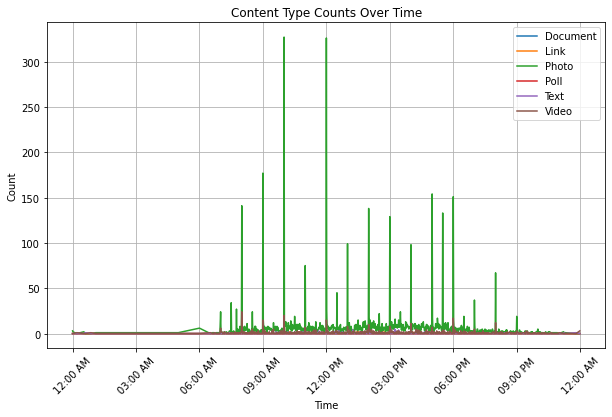

In [89]:
# Group the data by 'time' and 'Content Type' and count occurrences
content_type_counts = IBTC.groupby(['time', 'Content Type']).size().unstack(fill_value=0)

# Create a line plot for each content type over time
plt.figure(figsize=(10, 6))

for content_type in content_type_counts.columns:
    plt.plot(content_type_counts.index, content_type_counts[content_type], label=content_type)

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Content Type Counts Over Time')
plt.legend()
plt.grid(True)

# Set the date and time format for the x-axis
date_format = DateFormatter("%I:%M %p")  # Format for Hour:Minute AM/PM
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()





During the peak hours from 6 a.m. to 9 p.m., it has been noted that photo content tends to deliver better performance.

**Organic Impression / Reactions / Engagements vs sent by**

In [90]:
# Check for different types of missing values
IBTC['Sent by'].fillna('unknown', inplace=True)  # Fill missing values with 'unknown'
IBTC['Sent by'] = IBTC['Sent by'].str.strip()  # Remove leading/trailing whitespace

# Check for empty strings and replace them with 'unknown'
IBTC['Sent by'].replace('', 'unknown', inplace=True)

# Check for whitespace-only strings and replace them with 'unknown'
IBTC['Sent by'].replace(r'^\s*$', 'unknown', regex=True, inplace=True)


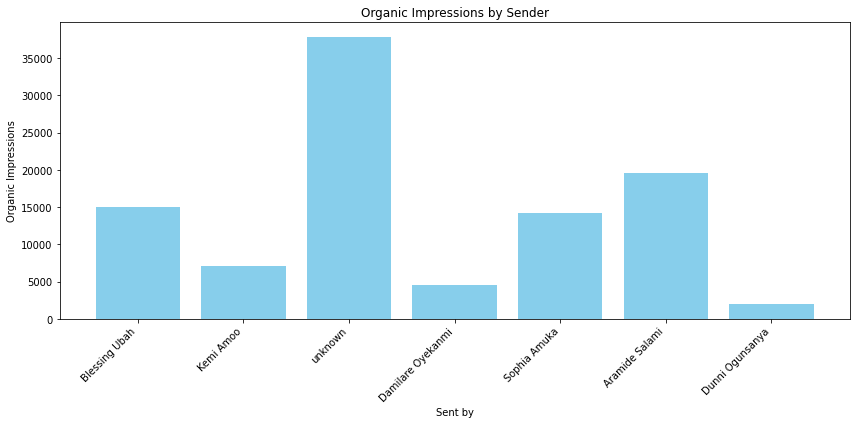

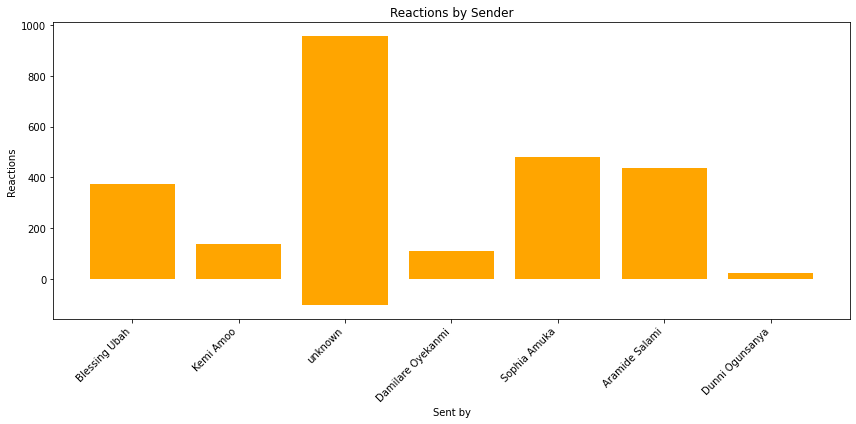

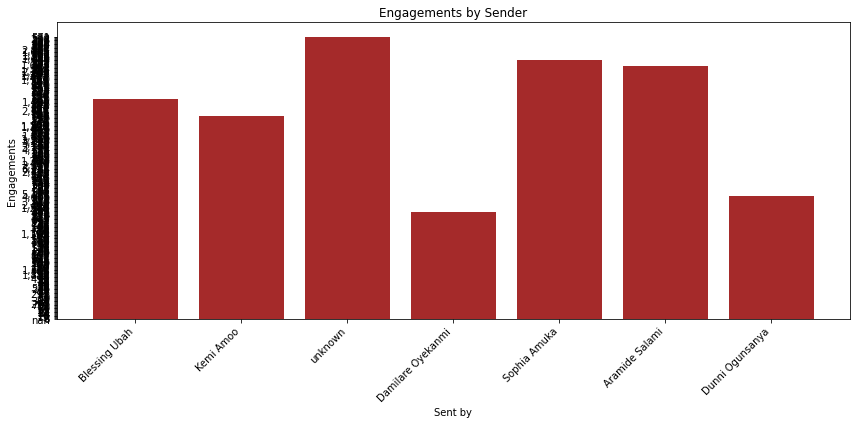

In [91]:
# Create a bar plot of Organic Impressions by Sender
plt.figure(figsize=(12, 6))
plt.bar(IBTC['Sent by'], IBTC['Organic Impressions'], color='skyblue')
plt.xlabel('Sent by')
plt.ylabel('Organic Impressions')
plt.title('Organic Impressions by Sender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




# Create a bar plot of Reactions by Sender
plt.figure(figsize=(12, 6))
plt.bar(IBTC['Sent by'], IBTC['Reactions'], color='orange')
plt.xlabel('Sent by')
plt.ylabel('Reactions')
plt.title('Reactions by Sender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



# Create a bar plot of Engagements by Sender
plt.figure(figsize=(12, 6))
plt.bar(IBTC['Sent by'], IBTC['Engagements'], color='brown')
plt.xlabel('Sent by')
plt.ylabel('Engagements')
plt.title('Engagements by Sender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The observation that posts made by Aramide Salami generate the most organic impressions, while posts made by Sophia Amuka and Aramide Salami have the most engagements and reactions, even though they both post with the same profile, provides several valuable insights for your social media strategy and understanding your audience:

1. **Content Strategy:** It's evident that Aramide Salami's posts excel in terms of organic reach and impressions. This suggests that their content or posting style resonates well with a broad audience, leading to increased visibility. Analyze the content and themes of Aramide Salami's posts to identify what aspects contribute to their success.

2. **Engagement Quality:** Sophia Amuka and Aramide Salami may have found a formula for generating high-quality engagements (likes, comments, shares, etc.). Their content likely resonates strongly with their audience, eliciting emotional responses and meaningful interactions. Investigate the content characteristics that drive these high-quality engagements.

3. **Audience Segmentation:** Consider the possibility that the audience segments for Aramide Salami and Sophia Amuka may differ slightly, even though they post under the same profile. Different types of content may appeal to distinct segments of the audience, leading to variations in engagement.

4. **Content Collaboration:** If Aramide Salami and Sophia Amuka collaborate on content creation or promotion, this observation underscores the power of teamwork. Their combined efforts may lead to better overall engagement and reactions.

5. **Content Replication:** Analyze the content strategies and posting times of both Aramide Salami and Sophia Amuka. Consider replicating successful content approaches across the profile to optimize engagement and organic reach.

6. **Audience Behavior:** Examine the behavior of the audience when interacting with content from these two individuals. What are the common themes, topics, or types of posts that receive the most attention? Understanding these preferences can guide your content creation.

7. **Profile Insights:** This observation highlights the importance of closely monitoring and analyzing the performance of individual profiles or contributors within your social media presence. Identifying top-performing individuals can inform your content strategy and help you allocate resources effectively.

In summary, this observation provides insights into the effectiveness of content posted by different individuals within the same profile. By dissecting the success factors of Aramide Salami's content and understanding why Sophia Amuka's and Aramide Salami's posts generate high-quality engagements, you can optimize your content strategy and foster a deeper connection with your audience.

**Posts with high organic impresssions,who sent them,time it was sent,content type and month**

In [92]:
# Sort the DataFrame by 'Organic Impressions' in descending order
sorted_df = IBTC.sort_values(by='Organic Impressions', ascending=False)

# Display the top posts with the highest organic impressions and their senders
top_posts = sorted_df[['Organic Impressions', 'Sent by', 'Post','Content Type','month']].head(15)
top_posts


,Organic Impressions,Sent by,Post,Content Type,month
Date,,,,,
2022-02-02 13:07:00,37889,unknown,NaN,Text,Feb
2020-11-16 13:36:00,27949,unknown,We are pleased to inform you that Stanbic IBTC...,Photo,Nov
2023-04-24 11:26:00,23379,unknown,NaN,Poll,Apr
2022-02-08 13:47:00,22991,unknown,New branch alert! 😎\nWe are delighted to annou...,Photo,Feb
2023-06-01 15:01:00,21335,unknown,NaN,Poll,Jun
2023-02-09 21:35:00,20433,unknown,New experience center alert! 💃🏾🕺🏾\nStanbic IBT...,Video,Feb
2021-10-28 22:03:00,19575,Aramide Salami,A partnership not just for now but for the fut...,Photo,Oct
2021-02-16 19:31:00,19399,unknown,Today we celebrate Dr. Ngozi Okonjo-Iweala for...,Photo,Feb
2022-01-11 19:08:00,18896,unknown,"Well done Super Eagles, keep soaring. \n#GoFor...",Photo,Jan


**Posts with high Reactions and who sent them,time it was sent,content type and month**

In [93]:
# Sort the DataFrame by 'Reactions' in descending order
sorted_df = IBTC.sort_values(by='Reactions', ascending=False)

# Display the top posts with the highest  Potential Reach and their senders
top_posts = sorted_df[['Reactions', 'Sent by', 'Post','Content Type','month']].head(15)
top_posts

,Reactions,Sent by,Post,Content Type,month
Date,,,,,
2022-02-02 13:07:00,957,unknown,NaN,Text,Feb
2021-02-16 19:31:00,588,unknown,Today we celebrate Dr. Ngozi Okonjo-Iweala for...,Photo,Feb
2020-09-29 16:46:00,527,unknown,She always made me a happy and a better man. S...,Photo,Sep
2020-11-16 13:36:00,496,unknown,We are pleased to inform you that Stanbic IBTC...,Photo,Nov
2020-09-14 14:00:00,481,Sophia Amuka,"Now is the time to ask yourself ""Will the #Fut...",Photo,Sep
2022-02-08 13:47:00,476,unknown,New branch alert! 😎\nWe are delighted to annou...,Photo,Feb
2020-01-29 21:30:00,466,Sophia Amuka,Today we celebrate an extraordinary leader. Ha...,Photo,Jan
2021-10-28 22:03:00,439,Aramide Salami,A partnership not just for now but for the fut...,Photo,Oct
2022-01-11 19:08:00,436,unknown,"Well done Super Eagles, keep soaring. \n#GoFor...",Photo,Jan


**Posts with high Engagements and who sent them,time it was sent,content type and month**

In [94]:
# Sort the DataFrame by 'Engagements' in descending order
sorted_df = IBTC.sort_values(by='Engagements', ascending=False)

# Display the top posts with the highest organic impressions and their senders
top_posts = sorted_df[['Engagements', 'Sent by', 'Post','Content Type','month']].head(15)
top_posts

,Engagements,Sent by,Post,Content Type,month
Date,,,,,
2023-07-13 12:03:00,nan,Blessing Ubah,Your money should not be a gamble. Before you ...,Photo,Jul
2017-11-14 13:00:00,nan,unknown,#ProductivityTip: When you stumble upon intere...,Photo,Nov
2017-11-17 17:43:00,nan,unknown,"Hello everyone, we received some new updates f...",Photo,Nov
2017-11-17 10:27:00,nan,unknown,#ProductivityTip\r\nComfort zones limit growth...,Photo,Nov
2017-11-17 10:00:00,nan,unknown,#ProductivityTip\r\nComfort zones limit growth...,Text,Nov
2017-11-16 17:00:00,nan,unknown,We will be contributing at this year’s West Af...,Photo,Nov
2017-11-16 10:00:00,nan,unknown,"Thinking of diversifying your investments, thi...",Photo,Nov
2017-11-15 16:10:00,nan,unknown,She knew we could help so they called to speak...,Photo,Nov
2017-11-15 13:00:00,nan,unknown,"Apparently, Toke’s uncle had encouraged her to...",Photo,Nov


### SUMMARY

***Summary of Findings:***

1. **Content Type Impact:** The analysis reveals that different content types have varying impacts on engagement metrics. Poll contents consistently generate more organic impressions, making them effective for broad reach. In contrast, link contents drive high engagement levels, indicating their ability to elicit interactions from the audience. Video, photo, and poll contents stand out for generating high reactions, emphasizing their ability to evoke emotional responses.

2. **Optimal Posting Hours:** The data suggests that the optimal posting hours for this platform are from 6 a.m. to 9 p.m. During this time frame, both organic impressions and engagements peak. This indicates that content posted during these hours has the potential to reach a larger audience and foster more interactions.

3. **Content Creators:** Aramide Salami's contributions stand out for generating the most organic impressions, highlighting the effectiveness of their content in terms of visibility. Additionally, both Sophia Amuka and Aramide Salami's contents generate the highest levels of reactions and engagements, despite posting under the same profile. This suggests a successful collaboration or content strategy that resonates with the audience.

4. **Content Preferences:** Photo content appears to be the most frequently posted content type on this platform. Understanding this preference can guide future content creation and ensure alignment with audience expectations.

These findings provide valuable insights for optimizing content strategy and scheduling, fostering engagement, and leveraging the strengths of different content types. By capitalizing on these insights, the platform can enhance its social media presence and audience engagement.

